# Data generation

In [1]:
# !pip install osmnx
# !pip install lxml

In [2]:
import osmnx as ox
import networkx as nx

In [4]:
LOCATION_KEY = "center_point"
DIST_KEY = "dist"

# paris_config = {
#     LOCATION_KEY: (48.86073049277094, 2.3437123339337846),
#     DIST_KEY: 5000    
# }

rome_config = {
    LOCATION_KEY: (41.89022652803327, 12.492513493265989),
    DIST_KEY: 1500
}

G = ox.graph_from_point(**rome_config, dist_type="bbox", network_type="drive")

In [5]:
G.number_of_nodes()

1116

In [6]:
pos = {
    k: (data["x"], data["y"])
    for k, data in G.nodes(data=True)
}

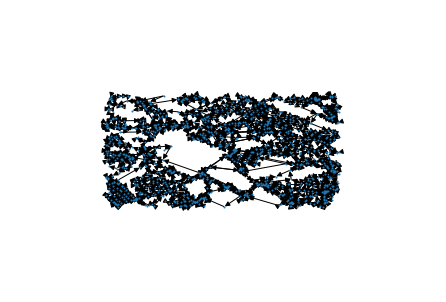

In [7]:
nx.draw(G, pos=pos, node_size=1)

In [8]:
for _, node_data in G.nodes(data=True):
    if "street_count" in node_data:
        del node_data["street_count"]
    if "x" in node_data:
        node_data["longitude"] = node_data["x"]
        del node_data["x"]
    if "y" in node_data:
        node_data["latitude"] = node_data["y"]
        del node_data["y"]

In [9]:
prop_to_delete = ["highway", "reversed", "geometry", "lanes", "osmid", "name", "maxspeed"]
for _, _, edge_data in G.edges(data=True):
    for p in prop_to_delete:
        if p in edge_data:
            del edge_data[p]
#     for v in edge_data.values():
#         if isinstance(v, list):
#             print(edge_data)
#             break

In [10]:
nx.write_graphml(G, "./data/osm_street_network_rome.graphml")